
# DECI project : `we rate dogs` 

In [61]:
# importing needed libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests


## **Data Gathering**

1. `twitter-archive-enhanced.csv`
2. `image-predictions.tsv`
3. `tweet-json.txt`

**1. reading the first data into a dataframe. (CSV)**

In [62]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [63]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


In [64]:
twitter_archive['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [65]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

**2. reading the 2nd data into a dataframe. (TSV)**

In [66]:
#create url variable using the URL of the dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get file with the image predictions
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [67]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [68]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**3. reading the 3rd data into a dataframe. (JSON)**

In [69]:
json_file = open('tweet_json.txt', encoding='utf-8')
tweet_json = pd.read_json(json_file, lines=True)

In [70]:
tweet_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [71]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [72]:
tweet_json.rename(columns={'id': 'tweet_id'}, inplace=True)

*Compining The three datasets by merging them over tweet_id*

In [73]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive, image_predictions, on='tweet_id'), tweet_json, on='tweet_id')

In [74]:
twitter_archive_master.head(2)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [75]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        


# Data Wrangling

## *Assessing Data:*


In [76]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [77]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
tweet_json.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [79]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [80]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [81]:
tweet_json.isna().sum()

created_at                          0
tweet_id                            0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [82]:
twitter_archive.duplicated().sum()

0

In [83]:
image_predictions.duplicated().sum()

0

In [84]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [85]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [86]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## *Assesment Report* 

### *Quality issues:*
1. getting rid of useless columns (twitter_archive),(tweet_json)                

2. alot of missing data in the features (twitter_archive),(tweet_json)          

3. Missing values should be represented as `None` (twitter_archive),(tweet_json)

4. Expanded_url cintaining more than one url                                    

5. the datatype for some of the columns is wrong (twitter_archive)              

6. the type of P2_dog is a boolean and not integer (image_predictions)          

7. P1, P2, and P3 should be in the right formatte (image_predictions)           

8. Rename the `Created_at` column as `Timestamp` and changing it's formatte (tweet_json)


### *Tidiness issues:*
1. Lowercase for P1, P2, and P3 sometimes (image_predictions)                   

2. Remove html tags from the source (twitter_archive)

3. merge all dog stages (twitter_archive) 

## *Cleaning Data*


In [88]:
# Making copies of original pieces of data
twitter_archive_copy=twitter_archive.copy()
image_predictions_copy=image_predictions.copy()
tweet_json_copy=tweet_json.copy()

### *Issue #1 :*

#### *Define:*

##### Getting rid of useless and uneeded columns
 ###### `quality issue`


#### *Code:*


In [89]:
# To remove the retweets
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]
# To remove the replies
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.in_reply_to_status_id.isnull()]

twitter_archive_copy.drop(columns = ['in_reply_to_user_id','retweeted_status_user_id',
'retweeted_status_timestamp'], errors='ignore', inplace = True)
tweet_json_copy.drop(columns = ['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id ','in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates','place','contributors'], errors='ignore', inplace = True)

#### *Test:*

In [90]:
twitter_archive_copy.head(1)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [91]:
tweet_json_copy.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_user_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### *Issue # 2 and 3:*

#### *Define:*
##### replacing all `NaN` values with `none`
###### `quality issue`


#### *Code:*


In [92]:
twitter_archive_copy.fillna('none',inplace=True)
tweet_json_copy.fillna('none',inplace=True)

C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_13172\2660058045.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'none' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  twitter_archive_copy.fillna('none',inplace=True)
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_13172\2660058045.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'none' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tweet_json_copy.fillna('none',inplace=True)


#### *Test:*

In [93]:
twitter_archive_copy.isna().sum()

tweet_id                 0
in_reply_to_status_id    0
timestamp                0
source                   0
text                     0
retweeted_status_id      0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
dtype: int64

In [94]:
tweet_json_copy.isna().sum()

created_at                       0
tweet_id                         0
id_str                           0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source                           0
in_reply_to_user_id              0
user                             0
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
retweeted                        0
possibly_sensitive               0
possibly_sensitive_appealable    0
lang                             0
retweeted_status                 0
quoted_status_id                 0
quoted_status_id_str             0
quoted_status                    0
dtype: int64

### *Issue #4 and 5 :*

#### *Define:*
##### 4- only take the url that follow the right formate
##### 5- fixing wrong data types 
###### `quality issue`


#### *Code:*

In [95]:
twitter_archive_copy['expanded_urls']  =twitter_archive_copy['expanded_urls'].str.extract('(https://\w+\.com/\w+/\w+/\d+/\w+/\d)', expand = True)
twitter_archive_copy['timestamp'] = twitter_archive_copy['timestamp'].astype(str)

#### *Test:*

In [96]:
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,none,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,none,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,none,none,none
1,892177421306343426,none,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,none,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,none,none,none
2,891815181378084864,none,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,none,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,none,none,none


In [97]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2097 non-null   int64 
 1   in_reply_to_status_id  2097 non-null   object
 2   timestamp              2097 non-null   object
 3   source                 2097 non-null   object
 4   text                   2097 non-null   object
 5   retweeted_status_id    2097 non-null   object
 6   expanded_urls          1971 non-null   object
 7   rating_numerator       2097 non-null   int64 
 8   rating_denominator     2097 non-null   int64 
 9   name                   2097 non-null   object
 10  doggo                  2097 non-null   object
 11  floofer                2097 non-null   object
 12  pupper                 2097 non-null   object
 13  puppo                  2097 non-null   object
dtypes: int64(3), object(11)
memory usage: 245.7+ KB


### *Issue #6 , 7 and 1(1 in tidness)  :*

#### *Define:*
##### fixing all problems for `P1, P2, and P3`
###### `quality issue`
###### ` Tidiness issue`

#### *Code:*

In [98]:
image_predictions_copy.p1 = image_predictions_copy.p1.str.replace("_", ",")
image_predictions_copy.p2 = image_predictions_copy.p2.str.replace("_", ",")
image_predictions_copy.p3 = image_predictions_copy.p3.str.replace("_", ",")
image_predictions_copy['p2_dog'] =  image_predictions_copy['p2_dog'].astype(bool)

#### *Test:*

In [99]:
image_predictions_copy.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh,springer,spaniel",0.465074,True,collie,0.156665,True,"Shetland,sheepdog",0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,"miniature,pinscher",0.074192,True,"Rhodesian,ridgeback",0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"German,shepherd",0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [100]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### *Issue #8 and 2(2 in tidness)  :*

#### *Define:*
##### changing column `Created_at` to `Timestamp` and changing it's formatte 
##### Removing html tags from the source
###### `quality issue`
###### ` Tidiness issue`

#### *Code:*

In [101]:
tweet_json_copy.rename(columns={'created_at': 'timestamp'}, inplace=True)
tweet_json_copy['timestamp'] = tweet_json_copy['timestamp'].astype(str)

In [102]:
if 'timestamp' in twitter_archive_copy.columns:
    twitter_archive_copy['timestamp'] = twitter_archive_copy['timestamp'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
if 'timestamp' in tweet_json_copy.columns:
    tweet_json_copy['timestamp'] = tweet_json_copy['timestamp'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)  

In [103]:
twitter_archive_copy['source']= twitter_archive_copy.source.str.extract('(http://\w+\.com/\w+/iphone)', expand = True)

#### *Test:*

In [104]:
tweet_json_copy.head(3)

,timestamp,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_user_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",none,...,39467,False,False,0.0,0.0,en,none,none,none,none
1,2017-08-01,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",none,...,33819,False,False,0.0,0.0,en,none,none,none,none
2,2017-07-31,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",none,...,25461,False,False,0.0,0.0,en,none,none,none,none


In [105]:
tweet_json_copy.columns

Index(['timestamp', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_user_id', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

### *Issue #3 in tidness:*

#### *Define:*
#####  merging all dog stages (twitter_archive) 
###### ` Tidiness issue`

#### *Code:*

In [106]:
# First replace 'None' in stage columns with empty string as follows.
twitter_archive_copy.doggo.replace('None', '', inplace=True)
twitter_archive_copy.floofer.replace('None', '', inplace=True)
twitter_archive_copy.pupper.replace('None', '', inplace=True)
twitter_archive_copy.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
twitter_archive_copy['stage'] = twitter_archive_copy.doggo + twitter_archive_copy.floofer + twitter_archive_copy.pupper + twitter_archive_copy.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.
twitter_archive_copy.loc[twitter_archive_copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_copy.loc[twitter_archive_copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_copy.loc[twitter_archive_copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# Handle missing values
twitter_archive_copy.loc[twitter_archive_copy.stage == '', 'stage'] = np.nan
# Replace 'None' in stage columns with empty string
twitter_archive_copy.doggo.replace('None', '', inplace=True)
twitter_archive_copy.floofer.replace('None', '', inplace=True)
twitter_archive_copy.pupper.replace('None', '', inplace=True)
twitter_archive_copy.puppo.replace('None', '', inplace=True)

# Merge into a new column
twitter_archive_copy['dog_stage'] = twitter_archive_copy.doggo + twitter_archive_copy.floofer + twitter_archive_copy.pupper + twitter_archive_copy.puppo

# Handle multiple stages
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Handle missing values
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == '', 'dog_stage'] = np.nan


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_13172\1834364432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_archive_copy.doggo.replace('None', '', inplace=True)
C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_13172\1834364432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

#### *Test:*

In [107]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,dog_stage
0,892420643555336193,none,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,none,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,none,none,none,nonenonenonenone,nonenonenonenone
1,892177421306343426,none,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,none,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,none,none,none,nonenonenonenone,nonenonenonenone
2,891815181378084864,none,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,none,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,none,none,none,nonenonenonenone,nonenonenonenone
3,891689557279858688,none,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,none,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,none,none,none,nonenonenonenone,nonenonenonenone
4,891327558926688256,none,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,none,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,none,none,none,nonenonenonenone,nonenonenonenone


## *Storing Data:*

In [108]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive_copy, image_predictions_copy, on = "tweet_id"), tweet_json_copy, on = "tweet_id")

In [109]:
columns_to_drop = ['in_reply_to_user_id','retweeted_status', 'quoted_status_id','quoted_status_id_str', 'quoted_status']
columns_in_df = [col for col in columns_to_drop if col in twitter_archive_master.columns]
twitter_archive_master = twitter_archive_master.drop(columns=columns_in_df)
twitter_archive_master.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

In [110]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,timestamp,source_x,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,...,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,none,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,none,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,892177421306343426,none,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,none,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en
2,891815181378084864,none,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,none,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,0.0,0.0,en
3,891689557279858688,none,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,none,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,0.0,0.0,en
4,891327558926688256,none,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,none,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,0.0,0.0,en


## **Analyzing and Visualizing Data** 

In [111]:
# bar plot function
def barhplot(x, y, xlabel, title):
    plt.figure(figsize=  (14, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.show()


### *Insights:*
1.  top 5 timestamps with the highest favorite_count

2.  top 5 timestamps with the highest retweet_count

3.  Finding the relation between favorite count and rating_denominator , the relation between retweet count and rating_numerator and between favorite count and retweet count 

#### 1.  *top 5 timestamps with the highest favorite_count*

In [112]:
favorite_count_top = twitter_archive_master.sort_values(by = 'favorite_count', ascending = False)
favorite_count_top_5= favorite_count_top[['tweet_id', 'source_x', 'favorite_count', 'timestamp']].head(5)
favorite_count_top_5

,tweet_id,source_x,favorite_count,timestamp
306,822872901745569793,http://twitter.com/download/iphone,132810,2017-01-21
769,744234799360020481,http://twitter.com/download/iphone,131075,2016-06-18
58,879415818425184262,http://twitter.com/download/iphone,107956,2017-06-26
397,807106840509214720,http://twitter.com/download/iphone,107015,2016-12-09
108,866450705531457537,http://twitter.com/download/iphone,106827,2017-05-22


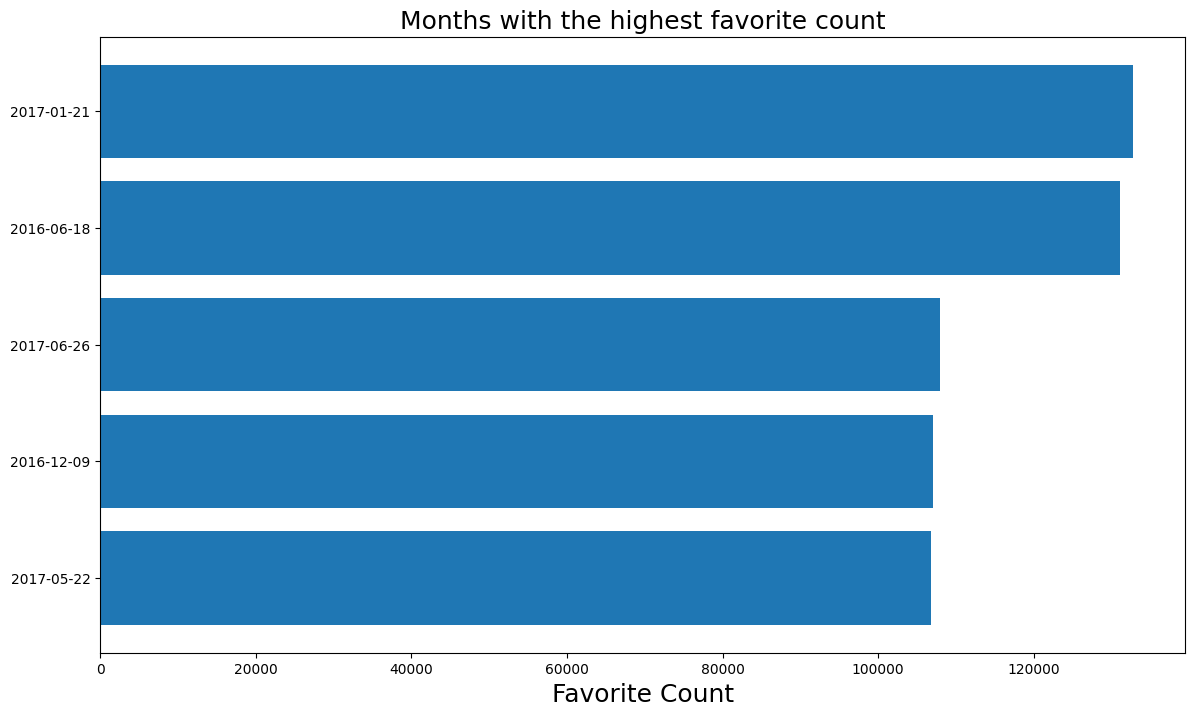

In [113]:
barhplot(favorite_count_top_5.timestamp,favorite_count_top_5.favorite_count, "Favorite Count", "Months with the highest favorite count")

#### 2.top 5 timestamps with the highest retweet_count


In [114]:
retweet_count_top = twitter_archive_master.sort_values(by = 'retweet_count', ascending = False)
retweet_count_top_5= retweet_count_top[['tweet_id', 'source_x', 'retweet_count', 'timestamp']].head(5)
retweet_count_top_5

,tweet_id,source_x,retweet_count,timestamp
769,744234799360020481,http://twitter.com/download/iphone,79515,2016-06-18
397,807106840509214720,http://twitter.com/download/iphone,56625,2016-12-09
804,739238157791694849,http://twitter.com/download/iphone,52360,2016-06-04
306,822872901745569793,http://twitter.com/download/iphone,48265,2017-01-21
58,879415818425184262,http://twitter.com/download/iphone,45849,2017-06-26


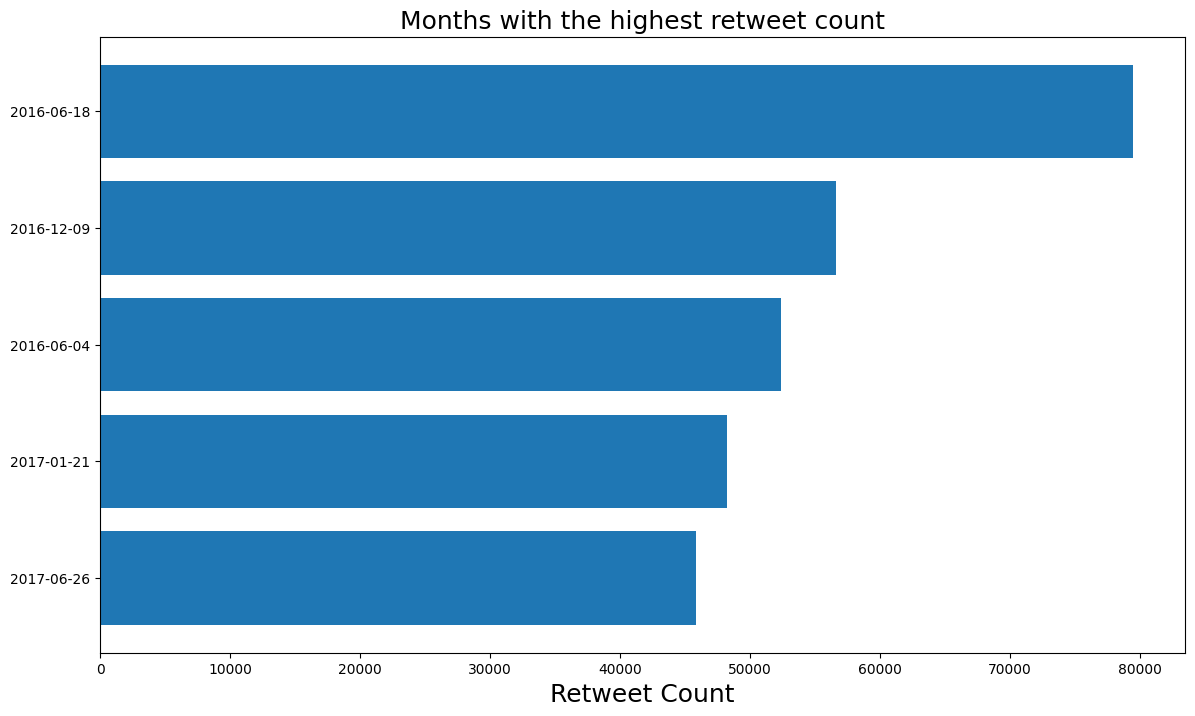

In [115]:
barhplot(retweet_count_top_5.timestamp,retweet_count_top_5.retweet_count, "Retweet Count", "Months with the highest retweet count")

#### 3. Finding the relation between favorite count and rating_denominator, the relation between retweet count and rating_numerator and between favorite count and retweet count 

In [116]:
twitter_archive_master.favorite_count.corr(twitter_archive_master.retweet_count)

0.9130143486107437

In [117]:
twitter_archive_master.favorite_count.corr(twitter_archive_master.rating_numerator)

0.010875625704468825

In [118]:
twitter_archive_master.favorite_count.corr(twitter_archive_master.rating_denominator)

-0.025707763329903644

In [119]:
twitter_archive_master.retweet_count.corr(twitter_archive_master.rating_numerator)

0.014663931984433252

In [120]:
twitter_archive_master.retweet_count.corr(twitter_archive_master.rating_denominator)

-0.01827031823119348